## 2022/2023 ENGLISH PREMIER LEAGUE ANALYTICS

In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.io as pio
import warnings
warnings.filterwarnings('ignore')

## Data Preprocessing


In [116]:
epl = pd.read_csv("epl_data.csv")

In [117]:
epl.columns

Index(['Div', 'Date', 'Time', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR',
       'HTHG', 'HTAG',
       ...
       'AvgC<2.5', 'AHCh', 'B365CAHH', 'B365CAHA', 'PCAHH', 'PCAHA', 'MaxCAHH',
       'MaxCAHA', 'AvgCAHH', 'AvgCAHA'],
      dtype='object', length=106)

In [118]:
epl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 324 entries, 0 to 323
Columns: 106 entries, Div to AvgCAHA
dtypes: float64(82), int64(16), object(8)
memory usage: 268.4+ KB


In [119]:
epl.shape

(324, 106)

In [120]:
#extract month from date column
epl['Month'] = pd.to_datetime(epl['Date']).dt.month_name()

#extract day of the week from the date column
epl['DayOfWeek'] = pd.to_datetime(epl['Date']).dt.day_name()

# extract hour from time column
epl['Hour'] = pd.to_datetime(epl['Time']).dt.hour

In [121]:
epl.head()

,Div,Date,Time,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,...,B365CAHA,PCAHH,PCAHA,MaxCAHH,MaxCAHA,AvgCAHH,AvgCAHA,Month,DayOfWeek,Hour
0,E0,05/08/2022,20:00,Crystal Palace,Arsenal,0,2,A,0,1,...,1.84,2.04,1.88,2.09,1.88,2.03,1.85,May,Sunday,20
1,E0,06/08/2022,12:30,Fulham,Liverpool,2,2,D,1,0,...,2.03,1.91,2.02,2.01,2.06,1.89,1.99,June,Wednesday,12
2,E0,06/08/2022,15:00,Bournemouth,Aston Villa,2,0,H,1,0,...,2.00,1.93,2.00,1.94,2.04,1.88,2.00,June,Wednesday,15
3,E0,06/08/2022,15:00,Leeds,Wolves,2,1,H,1,1,...,1.85,2.10,1.84,2.14,1.87,2.08,1.81,June,Wednesday,15
4,E0,06/08/2022,15:00,Newcastle,Nott'm Forest,2,0,H,0,0,...,1.96,1.99,1.93,2.19,1.97,2.03,1.86,June,Wednesday,15


## Here are some questions i intend to find solutions to

## Question 1:
- Which team has the most number of goals in the whole season?

In [122]:
# create a new dataframe grouped by teams and calculate the number of goals scored by each team
goals_df = epl.groupby(['HomeTeam'])['FTHG'].sum() + epl.groupby(['AwayTeam'])['FTAG'].sum()

In [123]:
# find the team with the most number of goals scored
teamWithGoals = goals_df.idxmax()

print('The team with the most number of goals scored is;', teamWithGoals)

The team with the most number of goals scored is; Man City


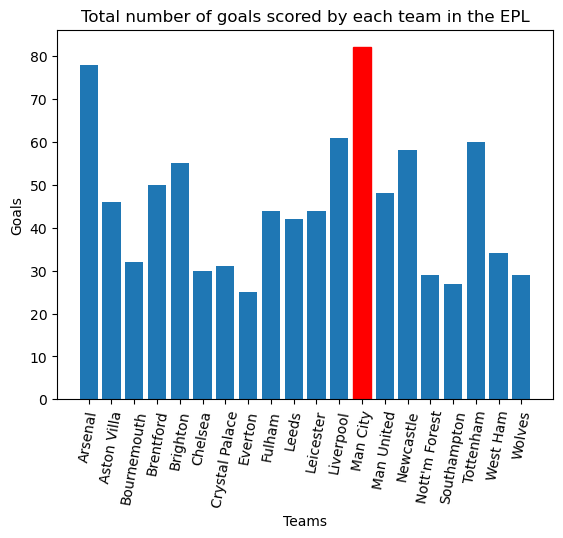

In [124]:
import matplotlib.pyplot as plt
import numpy as np

# Create a figure and axis object
fig, ax = plt.subplots()

# Create a bar plot
ax.bar(goals_df.index, goals_df.values)

# Set title and axis labels
ax.set_title('Total number of goals scored by each team in the EPL')
ax.set_xlabel('Teams')
ax.set_ylabel('Goals')
ax.tick_params(axis='x', labelrotation=80)


# Highlight the team
colors = np.where(goals_df.index == teamWithGoals, 'red', 'black')
for i, bar in enumerate(ax.containers):
    bar[goals_df.index.get_loc(teamWithGoals)].set_color(colors[goals_df.index.get_loc(teamWithGoals)])

# Show the plot
plt.show()

## Observations

From the code block above and the bar chart, it can be observed that Man City has the highest number of goals

## Question 2:
- Which team has the most number of home goals scored in this season?

In [125]:
# create a new dataframe grouped by hometeams and calculte the totl no of goals scored by each team
home_goals = epl.groupby(['HomeTeam'])['FTHG'].sum()

# find the team
teamwithmost_goals = home_goals.idxmax()

print('The team with the most number of home goals scored is;', teamwithmost_goals)


The team with the most number of home goals scored is; Man City


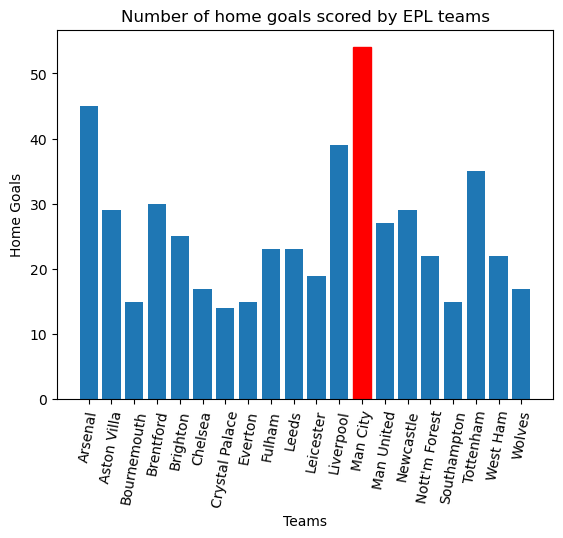

In [126]:
#data visualization
# Create a figure and axis object
fig, ax = plt.subplots()

# Create a bar plot
ax.bar(home_goals.index, home_goals.values)

# Set title and axis labels
ax.set_title('Number of home goals scored by EPL teams')
ax.set_xlabel('Teams')
ax.set_ylabel('Home Goals')
ax.tick_params(axis='x', labelrotation=80)

# Highlight the team with the most number of home goals scored
colors = np.where(home_goals.index == teamwithmost_goals, 'red', 'grey')
for i, bar in enumerate(ax.containers):
    bar[home_goals.index.get_loc(teamwithmost_goals)].set_color(colors[home_goals.index.get_loc(teamwithmost_goals)])

# Show the plot
plt.show()

## Observations:
- Man City still dominated in the aspect of home team goals

## Question 3:
- Which team has the most number of away goals scored in the whole season?

In [127]:
# create a new dataframe grouped by awayteams and calculate the totl no of goals scored by each team
away_goals = epl.groupby(['AwayTeam'])['FTAG'].sum()

# find the team
teamwithmostaway_goals = away_goals.idxmax()

print('The team with the most number of away goals scored is;', teamwithmostaway_goals)


The team with the most number of away goals scored is; Arsenal


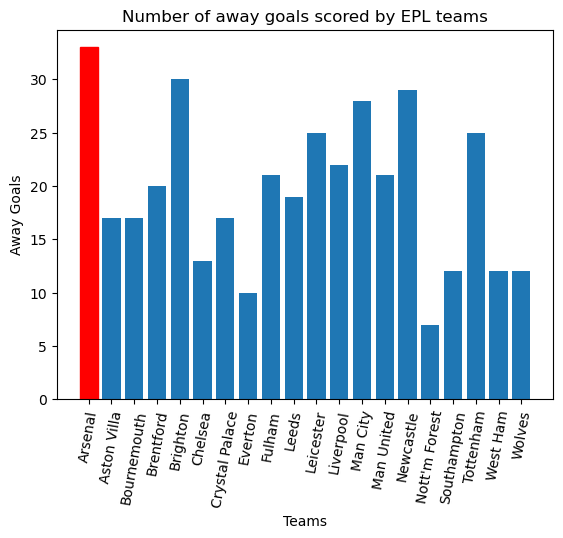

In [128]:
#data visualization
# Create a figure and axis object
fig, ax = plt.subplots()

# Create a bar plot
ax.bar(away_goals.index, away_goals.values)

# Set title and axis labels
ax.set_title('Number of away goals scored by EPL teams')
ax.set_xlabel('Teams')
ax.set_ylabel('Away Goals')
ax.tick_params(axis='x', labelrotation=80)

# Highlight the team with the most number of away goals scored
colors = np.where(away_goals.index == teamwithmostaway_goals, 'red', 'grey')
for i, bar in enumerate(ax.containers):
    bar[away_goals.index.get_loc(teamwithmostaway_goals)].set_color(colors[away_goals.index.get_loc(teamwithmostaway_goals)])

# Show the plot
plt.show()


## Observations
- It was a tough battle between Arsenal and Man City, but Arsenal dominated

## Question 4:
- Which team has the most number of clean sheets in the whole season?

In [129]:
# create a new dataframe grouped by home teams and calculate the total number of clean sheets by each team
home_cleanSheets = epl[epl['FTHG'] == 0].groupby(['HomeTeam'])['FTHG'].count()

# create a new dataframe grouped by away teams and calculate the total number of clean sheets by each team
away_cleanSheets = epl[epl['FTAG'] == 0].groupby(['AwayTeam'])['FTAG'].count()

# concatenate the two dataframes and sum the total number of clean sheets for each team
clean_sheets = pd.concat([home_cleanSheets, away_cleanSheets], axis=1).fillna(0)
clean_sheets['Total'] = clean_sheets['FTHG'] + clean_sheets['FTAG']

#find the team with the most number of clean sheets
team_withmost_cleansheets = clean_sheets['Total'].idxmax()

print('The team with the most number of clean sheets in the whole season is:', team_withmost_cleansheets)

The team with the most number of clean sheets in the whole season is: Bournemouth


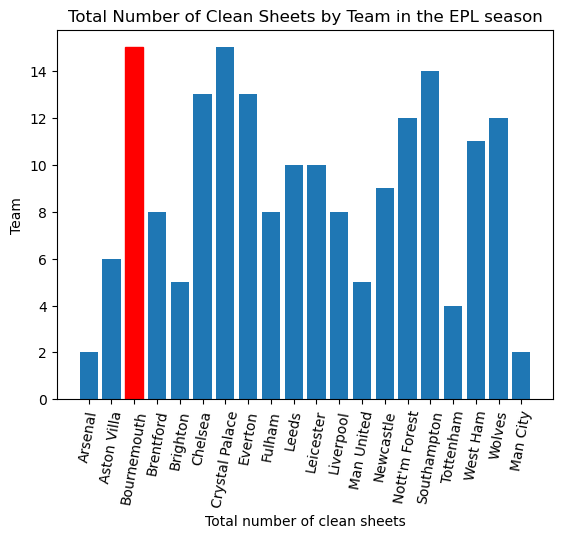

In [130]:
#data visualization

# Create a figure and axis object
fig, ax = plt.subplots()

# Create a horizontal bar plot
ax.bar(clean_sheets.index, clean_sheets['Total'])

# Set title and axis labels
ax.set_title('Total Number of Clean Sheets by Team in the EPL season')
ax.set_xlabel('Total number of clean sheets')
ax.set_ylabel('Team')
ax.tick_params(axis='x', labelrotation=80)

# Highlight the team with the most number of clean sheets
colors = np.where(clean_sheets.index == team_withmost_cleansheets, 'red', 'grey')
for i, bar in enumerate(ax.containers):
    bar[clean_sheets.index.get_loc(team_withmost_cleansheets)].set_color(colors[clean_sheets.index.get_loc(team_withmost_cleansheets)])

# Show the plot
plt.show()


## Observations
- Bournemouth lead in this

## Question 5:
- What is the average number of goals scored by home teams per match this season?
- What is the average number of goals scored by away teams per match this season?


In [131]:
# cal the average number of home team goals
avg_home_goals = epl['FTHG'].mean()

# cal the average number of away team goals
avg_away_goals = epl['FTAG'].mean()

print(f"The average number of home team goals per match is {avg_home_goals:.2f}")
print(f"The average number of away team goals per match is {avg_away_goals:.2f}")

The average number of home team goals per match is 1.59
The average number of away team goals per match is 1.20


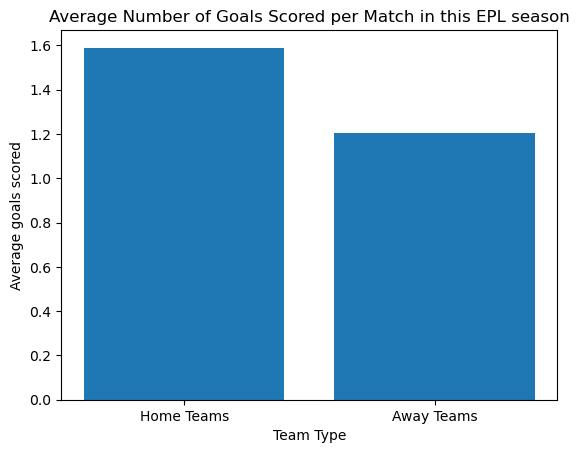

In [132]:
# data visualization
# Create a figure and axis object
fig, ax = plt.subplots()

# Create a bar plot
ax.bar(['Home Teams', 'Away Teams'], [avg_home_goals, avg_away_goals])

# Set title and axis labels
ax.set_title('Average Number of Goals Scored per Match in this EPL season')
ax.set_xlabel('Team Type')
ax.set_ylabel('Average goals scored')

# Show the plot
plt.show()

## Observations:
- The average number of goals per match were higher for home teams

## Question 6
- What is the correlation between the number of shots on target and the number of goals scored?

In [133]:
# calculate the correlation between number of shots

# FOR HOME TEAMS
correlation = epl['HST'].corr(epl['FTHG'])

#FOR AWAY TEAMS
correlation_away = epl['AST'].corr(epl['FTAG'])

print(f"The correlation between the number of shots on target and the number of goals scored for home teams is; {correlation:.2f}")
print(f"The correlation between the number of shots on target and the number of goals scored for away teams is; {correlation_away:.2f}")

The correlation between the number of shots on target and the number of goals scored for home teams is; 0.59
The correlation between the number of shots on target and the number of goals scored for away teams is; 0.53


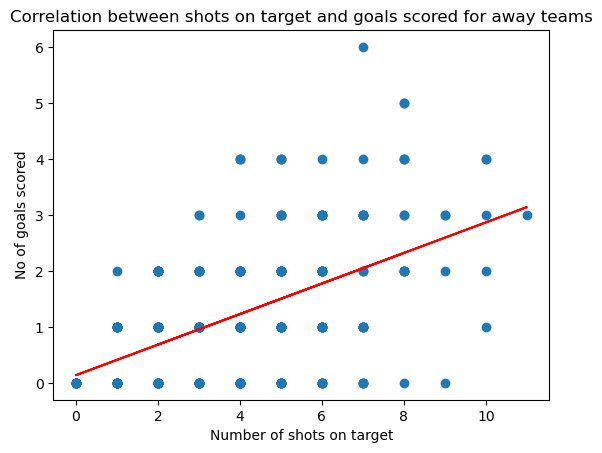

In [134]:
import matplotlib.pyplot as plt

# Create a figure and axis object
fig, ax = plt.subplots()

# Create a scatter plot with a trendline
ax.scatter(epl['AST'], epl['FTAG'])
slope, intercept = np.polyfit(epl['AST'], epl['FTAG'], 1)
ax.plot(epl['AST'], slope * epl['AST'] + intercept, color='red')

# Set title and axis labels
ax.set_title('Correlation between shots on target and goals scored for away teams')
ax.set_xlabel('Number of shots on target')
ax.set_ylabel('No of goals scored')

# Show the plot
plt.show()

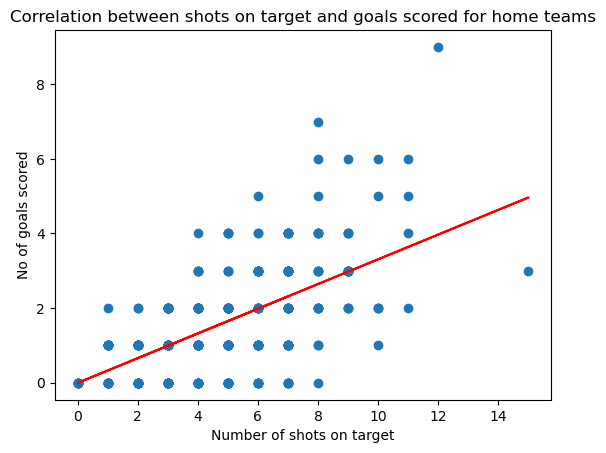

In [135]:

# Create a figure and axis object
fig, ax = plt.subplots()

# Create a scatter plot with a trendline
ax.scatter(epl['HST'], epl['FTHG'])
slope, intercept = np.polyfit(epl['HST'], epl['FTHG'], 1)
ax.plot(epl['HST'], slope * epl['HST'] + intercept, color='red')

# Set title and axis labels
ax.set_title('Correlation between shots on target and goals scored for home teams')
ax.set_xlabel('Number of shots on target')
ax.set_ylabel('No of goals scored')

# Show the plot
plt.show()

## Observation
- A trendline is useful when identifying the general direction and strength of the relationship between two variables.
If the trendline is sloping upward, it indicates a positive correlation between the variables. This means that as one variable increases, the other variable decreases

- The trendline was applied here to visualize the relationship between the number of shots on target and the number of goals scored for both home and away teams.
It helped to identify whether there's a strong or weak correlation between these two variables and if their correlation is positive or negative

## Question 7
- What is the percentage of matches where the home team won?
- What's the percentage of matches where the away team won?

In [136]:
#cal the percentage for home matches
home_wins = len(epl[epl['FTR'] == 'H']) / len(epl) * 100

away_wins = len(epl[epl['FTR'] == 'A']) / len(epl) * 100

print("Percentage of matches where the home team won: {:.2f}%".format(home_wins))
print("Percentage of matches where the away team won: {:.2f}%".format(away_wins))

Percentage of matches where the home team won: 46.30%
Percentage of matches where the away team won: 30.25%


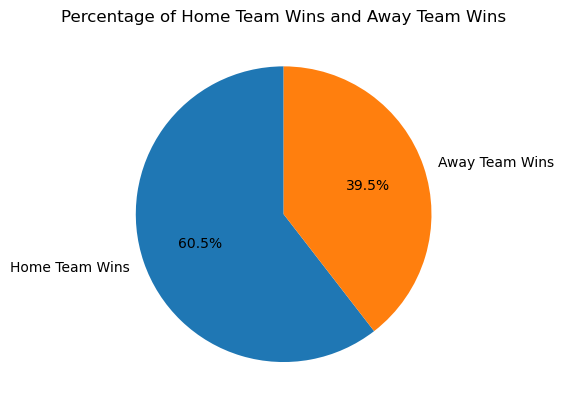

In [137]:
#data visualization

# Create a figure and axis object
fig, ax = plt.subplots()

# Create a pie chart
labels = ['Home Team Wins', 'Away Team Wins']
values = [home_wins, away_wins]
ax.pie(values, labels=labels, autopct='%1.1f%%', startangle=90)

# Set title
ax.set_title('Percentage of Home Team Wins and Away Team Wins')

# Show the plot
plt.show()


## Observations
- The percentage of home teams winning per match is higher than that of away teams

## QUESTION 8
- Which team has the highest number of fouls committed in this season?

In [138]:
fouls_committed = epl.groupby('HomeTeam')['HF'].sum() + epl.groupby('AwayTeam')['AF'].sum()

# find the team with the highest number of fouls committed in this season
team_withmost_fouls = fouls_committed.idxmax()
print('The team with the highest nunmber of fouls commmtted in this season is:', team_withmost_fouls)

The team with the highest nunmber of fouls commmtted in this season is: Crystal Palace


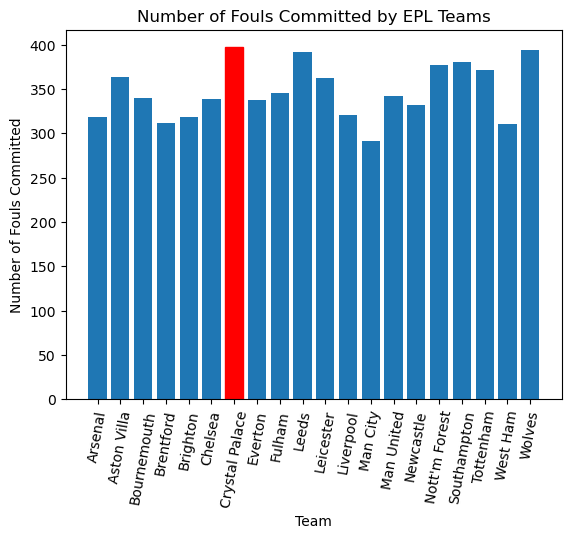

In [139]:

# create bar plot
fig, ax = plt.subplots()
ax.bar(fouls_committed.index, fouls_committed.values)

# set plot title and axis labels
ax.set_title('Number of Fouls Committed by EPL Teams')
ax.set_xlabel('Team')
ax.set_ylabel('Number of Fouls Committed')
ax.tick_params(axis='x', labelrotation=80)

# highlight team with the most fouls committed
for i, team in enumerate(fouls_committed.index):
    if team == team_withmost_fouls:
        ax.get_children()[i].set_color('red')
        break

plt.show()

## Observations: 
- Crystal Palace has the highest number of fouls committed in this season

## Question 9:
- Which team had the longest winning streak in the EPL season?

In [140]:
# find the longest winning streak for each team
team_win_streaks = {}
for team in set(epl['HomeTeam']):
    team_matches = epl[(epl['HomeTeam']== team) | (epl['AwayTeam'] == team)]
    team_matches = team_matches.reset_index(drop=True)
    win_streak = 0
    max_win_streak = 0
    for i, row in team_matches.iterrows():
        if row['FTR'] == 'H' and row['HomeTeam'] == team:
            win_streak += 1
            
        elif row['FTR'] == 'A' and row['AwayTeam'] == team:
            win_streak += 1
            
        else:
            if win_streak > max_win_streak:
                max_win_streak = win_streak
            win_streak = 0
            
    team_win_streaks[team] = max_win_streak
    
    
# find the team with the longest winning streak
longest_win_streak = max(team_win_streaks, key=team_win_streaks.get)

print(f"The team with the longest winning streak is {longest_win_streak} with a streak of {team_win_streaks[longest_win_streak]}.")

The team with the longest winning streak is Arsenal with a streak of 7.


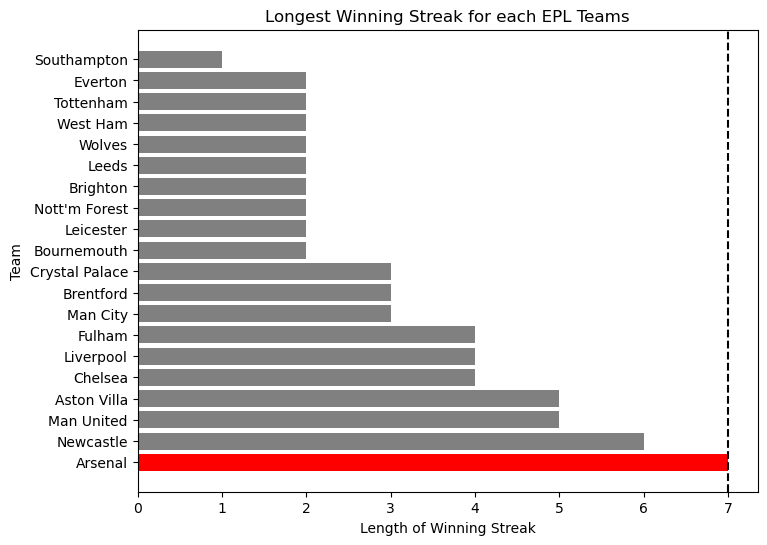

In [141]:
import matplotlib.pyplot as plt

# sort the dictionary by longest win streak first
sorted_win_streaks = {k: v for k, v in sorted(team_win_streaks.items(), key=lambda item: item[1], reverse=True)}

# create a list of teams and a list of their win streaks
teams = list(sorted_win_streaks.keys())
win_streaks = list(sorted_win_streaks.values())

# create a horizontal bar chart
fig, ax = plt.subplots(figsize=(8,6))
ax.barh(teams, win_streaks, color=['red' if team == longest_win_streak else 'grey' for team in teams])

# add labels and title
ax.set_xlabel('Length of Winning Streak')
ax.set_ylabel('Team')
ax.set_title('Longest Winning Streak for each EPL Teams')

# add a vertical line for the longest win streak
ax.axvline(x=team_win_streaks[longest_win_streak], color='black', linestyle='--')

plt.show()


## Observation:
- Arsenal led the pack 

## Question 10:
- Which team has the longest losing streak?

In [142]:
# create a new dataframe
losing_streaks = pd.DataFrame(columns = ['Team', 'Longest Losing Streak'])

# iterate over each team in the dataset
for team in epl['HomeTeam'].unique():
    # create a boolean mask for matches that has teams that lost
    mask = ((epl['HomeTeam'] == team) & (epl['FTR'] == 'H')) | ((epl['AwayTeam'] == team) & (epl['FTR'] == 'A'))
    # create a series of consecutive numbers for each group of consecutive matches lost by a team
    losing_streak = (~mask).cumsum()[mask]
    
    # if the team has lost at least one match, add the longest losing streak to the dataframe
    if len(losing_streak) > 0:
        losing_streaks = losing_streaks.append({'Team': team, 'Longest Losing Streak': losing_streak.value_counts().max()}, ignore_index=True)
        
#sort the dataframe
losing_streaks = losing_streaks.sort_values(by='Longest Losing Streak', ascending=False)

# get the tem with the longest losing streak 
team_withlongest_losing = losing_streaks.iloc[0]['Team']

print(f"The team with the longest losing streak in this EPL season is {team_withlongest_losing} with a losing streak of {losing_streaks.iloc[0]['Longest Losing Streak']} matches.")

The team with the longest losing streak in this EPL season is Man United with a losing streak of 2 matches.


## Observations:
- Manchester United seems to be leading 

## Question 11:
- Which team had the highest number of goals in a single match?

In [143]:
# create a new dataframe
goals_in_singlematch = pd.DataFrame(columns = ['Team', 'Goals'])

#iterate iver each team in the dataset
for team in epl['HomeTeam'].unique():
    #create a boolean mask for matches where team played at home
    home_mask = epl['HomeTeam'] == team
    
    #create a boolean mask for matches where team played away
    away_mask = epl['AwayTeam'] == team
    
    #concatenate the two masks
    mask = pd.concat([home_mask, away_mask], axis = 0, ignore_index=True)
    
    #get the number of goals scored in each match played by the team
    goals = pd.concat([epl.loc[home_mask, 'FTHG'], epl.loc[away_mask, 'FTAG']], axis = 0, ignore_index=True)
    
    #get the maximum number of goals scored
    max_goals = goals.max()
    
    if max_goals > 0:
        goals_in_singlematch = goals_in_singlematch.append({'Team': team, 'Goals': max_goals}, ignore_index =True)
        
        
#sort the dataframe
goals_in_singlematch = goals_in_singlematch.sort_values(by='Goals', ascending= False)

#get the teams with the highest number of goals scored in a single match
team_with_highestgoals = goals_in_singlematch.iloc[0]['Team']

print(f"The team with the highest number of goals scored in a single match in the EPL season is {team_with_highestgoals} with {goals_in_singlematch.iloc[0]['Goals']} goals.")

The team with the highest number of goals scored in a single match in the EPL season is Liverpool with 9 goals.


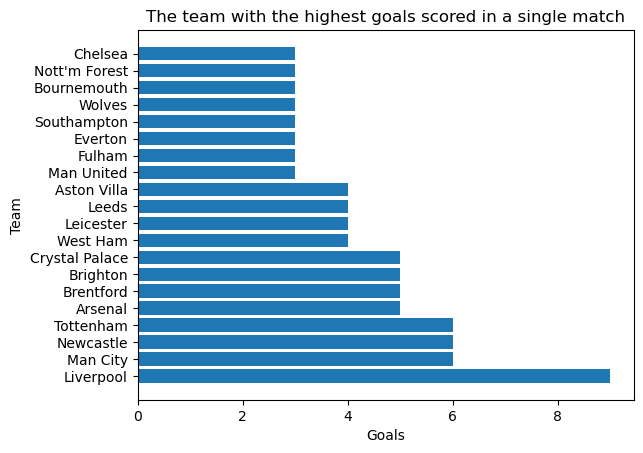

In [144]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

# create the bar plot
ax.barh(y=goals_in_singlematch['Team'], width=goals_in_singlematch['Goals'])

# set the title and axis labels
ax.set_title('The team with the highest goals scored in a single match')
ax.set_xlabel('Goals')
ax.set_ylabel('Team')


plt.show()

## Observation:
- Liverpool definitely excelled by creating this record during this season

## QUESTION 12:
- Are there any potential referee bias?

In [145]:
from scipy.stats import ttest_ind
# get a list of all the referees in the dataset
referees = epl['Referee'].unique()

# iterate over the referee and calculate the win percentage for home and away teams
for referee in referees:
    ref_df = epl[epl['Referee'] == referee]
    home_wins = ref_df[ref_df['FTR'] == 'H'].shape[0]
    away_wins = ref_df[ref_df['FTR'] == 'A'].shape[0]
    total_matches = home_wins + away_wins + ref_df[ref_df['FTR'] == 'D'].shape[0]
    home_win_pct = home_wins / total_matches
    away_pin_pct = away_wins / total_matches
    
    # conduct a two-sample t-test to see if there is a significance 
    t_stat, p_val = ttest_ind(ref_df[ref_df['FTR'] == 'H']['FTHG'], ref_df[ref_df['FTR'] == 'A']['FTAG'], equal_var = False)
    if p_val < 0.05:
        print(f"Referee {referee} has a potential bias")
    else:
        print(f"Referee {referee} does not have a potential bias")

Referee A Taylor does not have a potential bias
Referee A Madley does not have a potential bias
Referee P Bankes does not have a potential bias
Referee R Jones does not have a potential bias
Referee S Hooper does not have a potential bias
Referee A Marriner does not have a potential bias
Referee C Pawson does not have a potential bias
Referee J Gillett does not have a potential bias
Referee P Tierney does not have a potential bias
Referee M Oliver does not have a potential bias
Referee D England does not have a potential bias
Referee G Scott does not have a potential bias
Referee D Coote does not have a potential bias
Referee T Harrington does not have a potential bias
Referee J Brooks does not have a potential bias
Referee S Attwell does not have a potential bias
Referee M Salisbury does not have a potential bias
Referee T Bramall does not have a potential bias
Referee C Kavanagh does not have a potential bias
Referee R Madley does not have a potential bias
Referee D Bond does not hav

## Observation:
- It seems that there are no bias.
- This analysis was based on statistical patterns 

## Question 13:
- How does the number of shots on target vary with the outcome of matches?

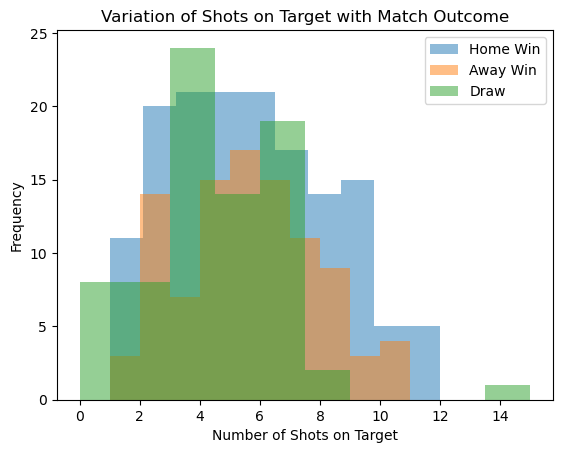

In [146]:
import matplotlib.pyplot as plt

# extract relevant data
epl_df = epl[['FTHG','FTAG', 'FTR', 'HST', 'AST']]
home_win = epl_df[epl_df['FTR'] == 'H']['HST']
away_win = epl_df[epl_df['FTR'] == 'A']['AST']
draw = epl_df[epl_df['FTR'] == 'D']['HST']

# create subplots
fig, ax = plt.subplots()

# plot histograms for each category
ax.hist(home_win, alpha=0.5, label='Home Win')
ax.hist(away_win, alpha=0.5, label='Away Win')
ax.hist(draw, alpha=0.5, label='Draw')

# set axis labels and title
ax.set_xlabel('Number of Shots on Target')
ax.set_ylabel('Frequency')
ax.set_title('Variation of Shots on Target with Match Outcome')

# add legend
ax.legend()

# show the plot
plt.show()

## Observations:
- Home teams have a higher number of shots on target which is indicated by the higher frequency of shots on target.
- There's a possibility that the higher the number of shots on target, the higher the chances of winning the match.

## Question 14:
- What is the trend of the number of goals scored by home teams over time? Does it increase, decrease or remain constant?

## Observation:
- There s

## Observation:
- The rolling mean and percent change are useful metrics for identifying periods in which the number of goals scored by home teams increased or decreased sharply.

## Question 15:
- Does playing at home affect the chances of winning a match, and how does it vary across different teams?

In [147]:
# create a new column
epl['HomeWin'] = epl['FTR'].apply(lambda x: 1 if x == 'H' else 0)

#calculate the home win percentage for each team 
home_win_pct = epl.groupby('HomeTeam')['HomeWin'].mean().reset_index()

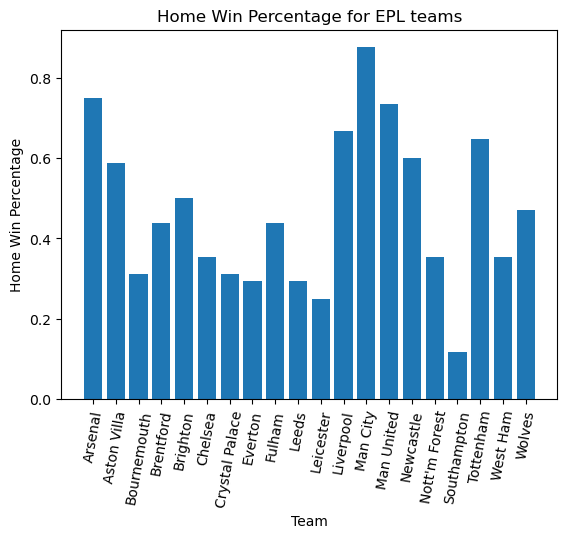

In [149]:
import matplotlib.pyplot as plt

# create a bar plot for home win percentage
fig, ax = plt.subplots()
ax.bar(home_win_pct['HomeTeam'], home_win_pct['HomeWin'])
ax.set_title('Home Win Percentage for EPL teams')
ax.set_xlabel('Team')
ax.set_ylabel('Home Win Percentage')
ax.tick_params(axis='x', labelrotation=80)

plt.show()

## Observation:
- Manchester City seems to always have home win advantage
- Southampton might need to improve

## Question 16:
- Which teams tend to score more goals in the first half of a match versus the second half, and does this trend vary by team

In [150]:
 #create a new column to indicate whether the home team won or not
epl['HomeWin'] = epl['FTR'].apply(lambda x:1 if x == 'H' else 0)

epl['Half'] = epl['Time'].apply(lambda x: 1 if int(x.split(':')[0]) <= 45 else 2)

#create a new column to indicate the half of the match(1 for first half, 2 for second half)
epl['HomeFirstHalf'] = epl.apply(lambda x: 1 if (x['FTHG'] > x['FTAG'] and x['Half'] == 1) or (x['FTHG'] < x['FTAG'] and x['Half'] ==2) else 0, axis=1)

#calculate the percentage of matches where the home team scored more goals in the first half
home_first_half = epl.groupby(['HomeTeam'])['HomeFirstHalf'].mean().reset_index()
home_first_half.head()

,HomeTeam,HomeFirstHalf
0,Arsenal,0.750000
1,Aston Villa,0.588235
2,Bournemouth,0.312500
3,Brentford,0.437500
4,Brighton,0.500000


## Question 17:
- Which team have the conversion rate for shots on target, and how does this affect their overall performance?


In [151]:
# calculate conversion rate for each team
home_shots = epl.groupby('HomeTeam')[['HS', 'HST', 'FTHG']].sum().reset_index()
home_shots['Conversion Rate'] = home_shots['FTHG'] / home_shots['HST']

away_shots = epl.groupby('AwayTeam')[['AS', 'AST', 'FTAG']].sum().reset_index()
away_shots['Conversion Rate'] = away_shots['FTAG'] / away_shots['AST']

conversion_rates = pd.concat([home_shots.rename(columns={'HomeTeam': 'Team'}),
                              away_shots.rename(columns={'AwayTeam': 'Team'})],
                             axis=0, ignore_index=True)

conversion_rates = conversion_rates.groupby('Team')['Conversion Rate'].mean().reset_index()
conversion_rates = conversion_rates.sort_values('Conversion Rate', ascending=False)

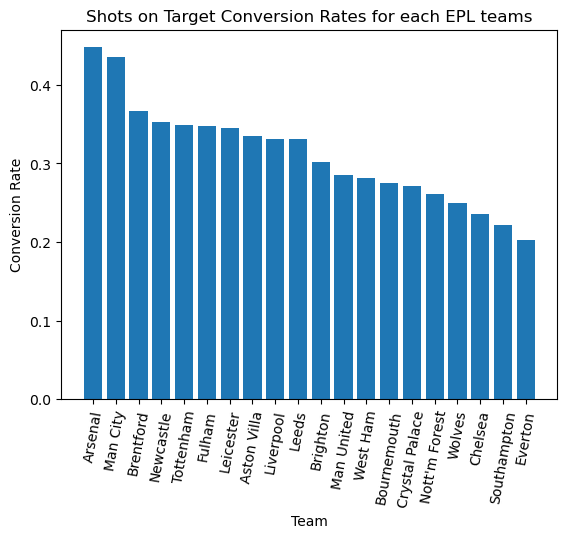

In [115]:
import matplotlib.pyplot as plt

# create a bar plot
plt.bar(conversion_rates['Team'], conversion_rates['Conversion Rate'])

# set the x-axis labels to be rotated 45 degrees
plt.xticks(rotation=45)

# set the title and axis labels
plt.title('Shots on Target Conversion Rates for each EPL teams')
plt.xlabel('Team')
plt.ylabel('Conversion Rate')
plt.tick_params(axis='x', labelrotation=80)

# show the plot
plt.show()

## Observation:
- Arsenal and Manchester City tends to have a higher conversion rate

## Note:
- There are more insights that can be gotten from this dataset